# Lead Scoring Case Study - DSC52 - Dhara Khamar

### Problem Statement :
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. They have process of form filling on their website after which the company that individual as a lead. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc.Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. Now, this means if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as Hot Leads.If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Business Objective: 
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# Step 1: Importing & Reading Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

# Importing seaborn and matplot libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading Lead dataset
lead_data = pd.read_csv("leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Step 2: Inspecting the Dataframe

In [3]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [4]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Insights: 
- Dataset has 9240 rows and 37 variables
- There are quite a few categorical variables present in this dataset for which we will need to create dummy variables. 
- All the dataypes of the variables are in correct format.
- Lots of null values are present in columns which need to be treated. 

# Step 3: Data Cleaning & Preparation

### 1. Handling the 'Select' level that is present in many of the categorical variables

In [6]:
# Replacing 'Select' with NaN (Since it means no option is selected)
lead_data = lead_data.replace('Select',np.nan)

### 2. Checking for NULL values

In [7]:
# Checking the percentage of missing values in each column
(round(lead_data.isnull().sum()/len(lead_data.index),2)*100).sort_values(ascending=False)

How did you hear about X Education               78.0
Lead Profile                                     74.0
Lead Quality                                     52.0
Asymmetrique Profile Score                       46.0
Asymmetrique Activity Score                      46.0
Asymmetrique Profile Index                       46.0
Asymmetrique Activity Index                      46.0
City                                             40.0
Specialization                                   37.0
Tags                                             36.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
Last Activity                                     1.0
Page Views Per Visit                              1.0
TotalVisits                                       1.0
Receive More Updates About Our Courses            0.0
I agree to pay the amount through cheque          0.0
Get updates on DM Content   

In [8]:
# dropping the columns with missing values greater than or equal to 35% .
# dropping 'Prospect ID" and "Lead Number" columns as they are not useful for the model building and analysis
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Profile Index',
                                  'Asymmetrique Activity Score','City','Prospect ID','Lead Number','Specialization', 'Tags'])

In [9]:
# Checking the percentage of missing values in each column again after removing above columns
(round(lead_data.isnull().sum()/len(lead_data.index),2)*100).sort_values(ascending=False)

What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Country                                          27.0
TotalVisits                                       1.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Lead Origin                                       0.0
Newspaper                                         0.0
A free copy of Mastering The Interview            0.0
I agree to pay the amount through cheque          0.0
Get updates on DM Content                         0.0
Update me on Supply Chain Content                 0.0
Receive More Updates About Our Courses            0.0
Through Recommendations                           0.0
Digital Advertisement                             0.0
Search                                            0.0
X Education Forums                                0.0
Newspaper Article                                 0.0
Magazine                    

### Column: 'What is your current occupation'

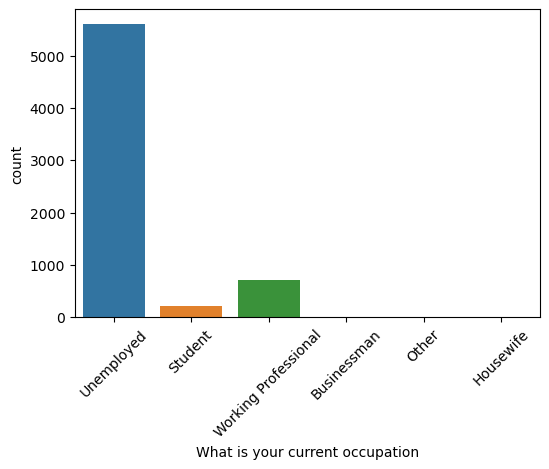

In [10]:
# Visualizing this column
plt.figure(figsize=(6,4))
sns.countplot(lead_data['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

In [11]:
# Imputing null values with mode value
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].fillna(lead_data['What is your current occupation'].mode()[0])

In [12]:
lead_data['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

### Column: 'What matters most to you in choosing a course'

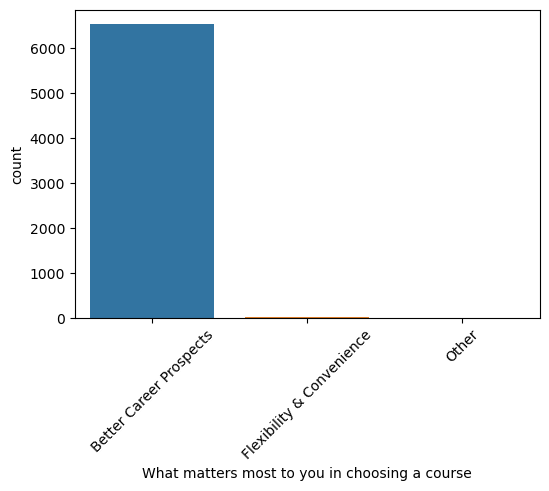

In [13]:
# Visualizing this column
plt.figure(figsize=(6,4))
sns.countplot(lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=45)
plt.show()

### Column: 'Country'

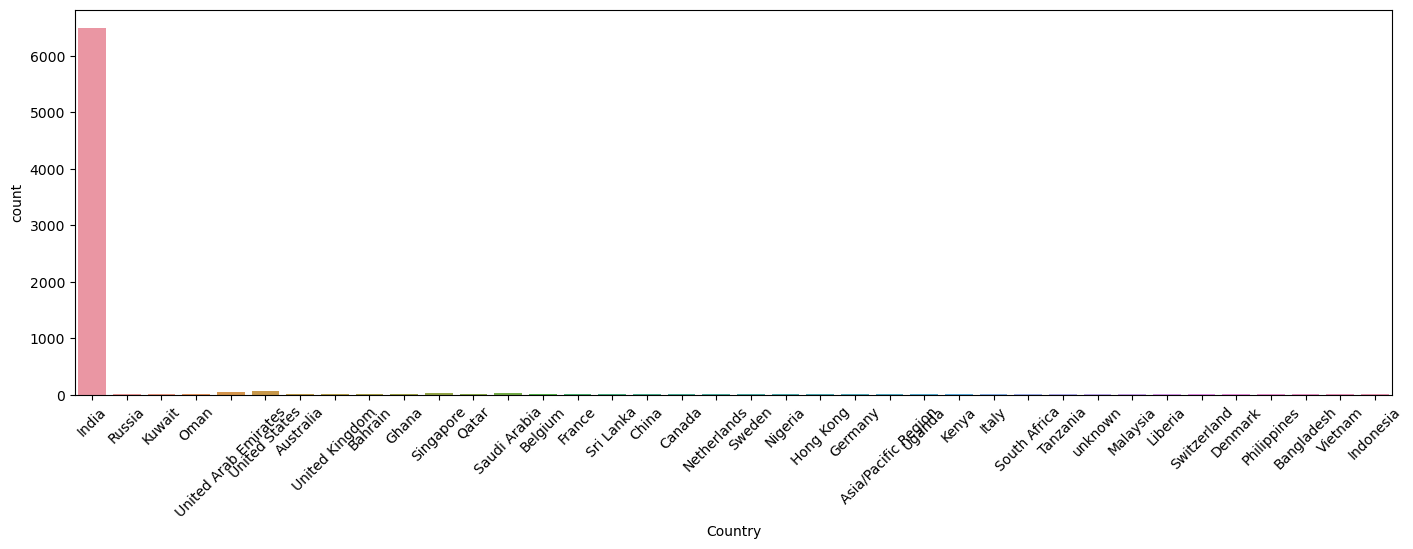

In [14]:
# Visualizing this column
plt.figure(figsize=(17,5))
sns.countplot(lead_data['Country'])
plt.xticks(rotation=45)
plt.show()

### Insights: 
- 'Country' and 'What matters most to you in choosing a course' are Highly skewed columns  - drop these columns as it may affect the model

In [15]:
# dropping above columns
lead_data=lead_data.drop(columns=['Country','What matters most to you in choosing a course'])

In [16]:
# Checking again the number of missing values in each column
(round(lead_data.isnull().sum()/len(lead_data.index),2)*100).sort_values(ascending=False)

TotalVisits                                 1.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Lead Origin                                 0.0
X Education Forums                          0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
Magazine                                    0.0
Newspaper Article                           0.0
Lead Source                                 0.0
Search                                      0.0
What is your current occupation             0.0
Total Time Spent on Website                 0.0
Converted                                   0.0
Do Not Call                             

In [17]:
# Rest missing values are under 2% so we can drop these rows
# Dropping the rows with null values
lead_data.dropna(inplace = True)

In [18]:
# Checking again the percentage of missing values in each column
(round(lead_data.isnull().sum()/len(lead_data.index),2)*100).sort_values(ascending=False)

Lead Origin                                 0.0
Newspaper Article                           0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Magazine                                    0.0
Lead Source                                 0.0
Search                                      0.0
What is your current occupation             0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                                   0.0
Do Not Call                             

In [19]:
lead_data.shape

(9074, 23)

### 3. Checking for outliers

In [20]:
lead_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


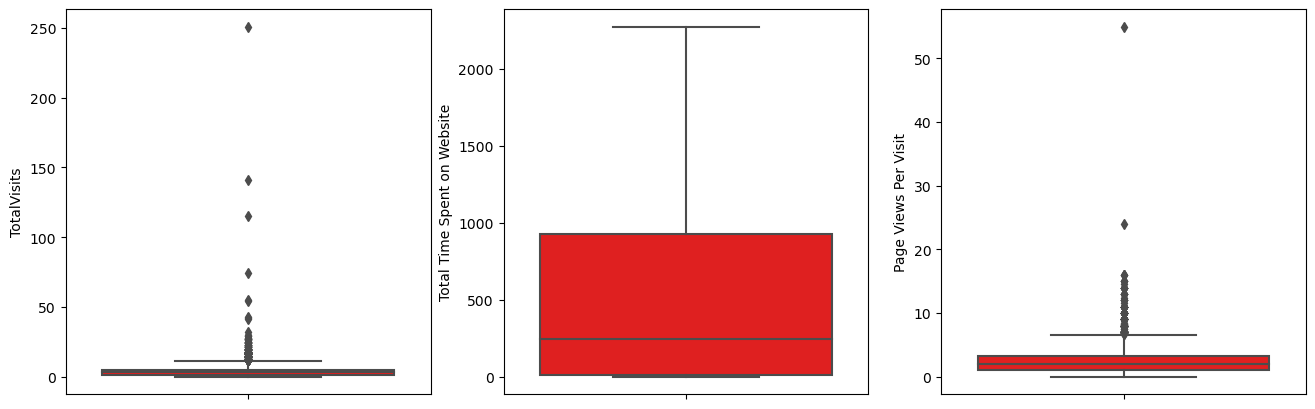

In [21]:
# Lets visualize numeric variables for outliers - TotalVisits, Total Time Spent on Website, Page Views Per Visit

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(y = lead_data.TotalVisits, orient = "h", color = "red")
plt.subplot(1,3,2)
sns.boxplot(y = lead_data["Total Time Spent on Website"], orient = "h", color = "red")
plt.subplot(1,3,3)
sns.boxplot(y = lead_data["Page Views Per Visit"], orient = "h", color = "red")
plt.show()

### Insights: 
- As we can see there are a number of outliers in the data totalvisits and Page Views Per Visit
- We will cap the outliers to 95% value for analysis

In [22]:
# Capping the outliers to 95% value
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

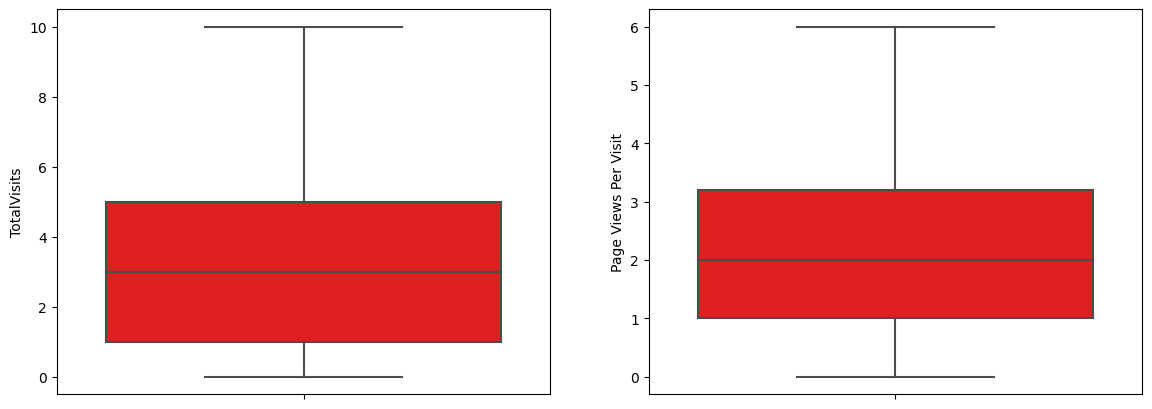

In [23]:
# Lets look at above variables again after treating outliers
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(y = lead_data.TotalVisits, orient = "h", color = "red")

plt.subplot(1,2,2)
sns.boxplot(y = lead_data["Page Views Per Visit"], orient = "h", color = "red")
plt.show()

### 4.  Univariate Analysis

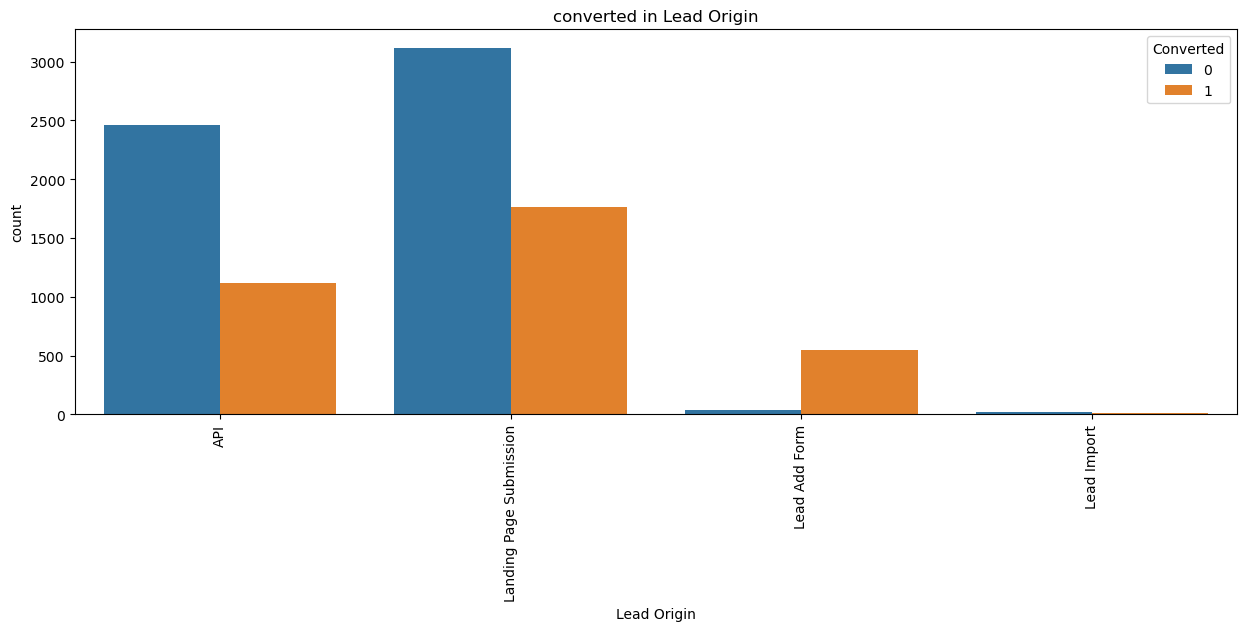

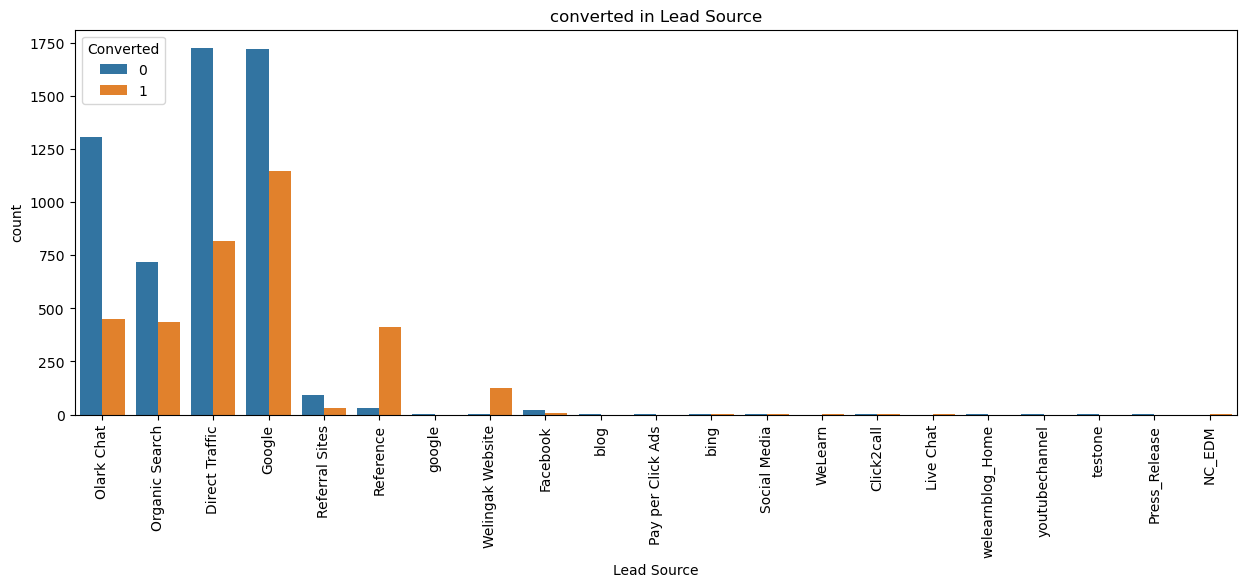

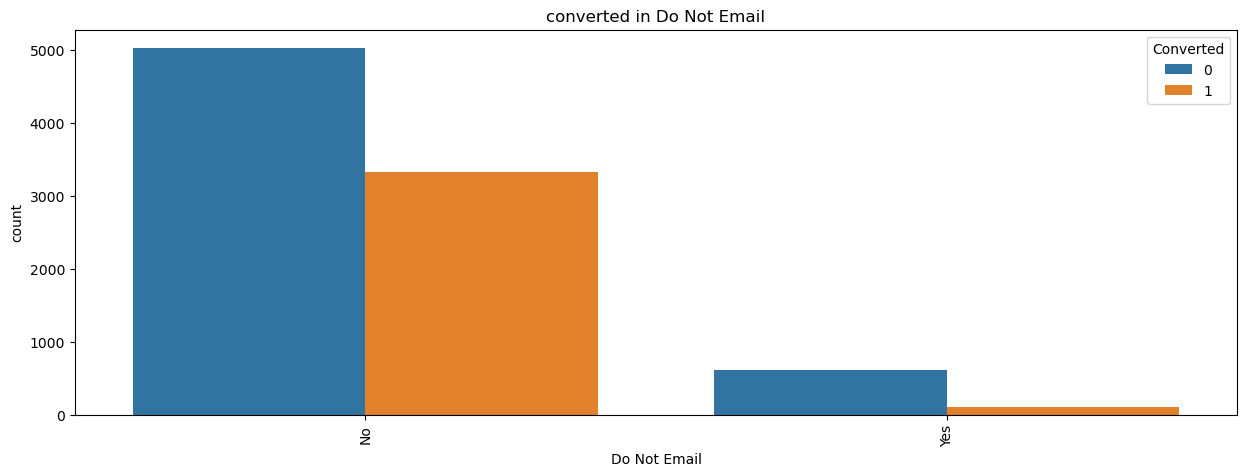

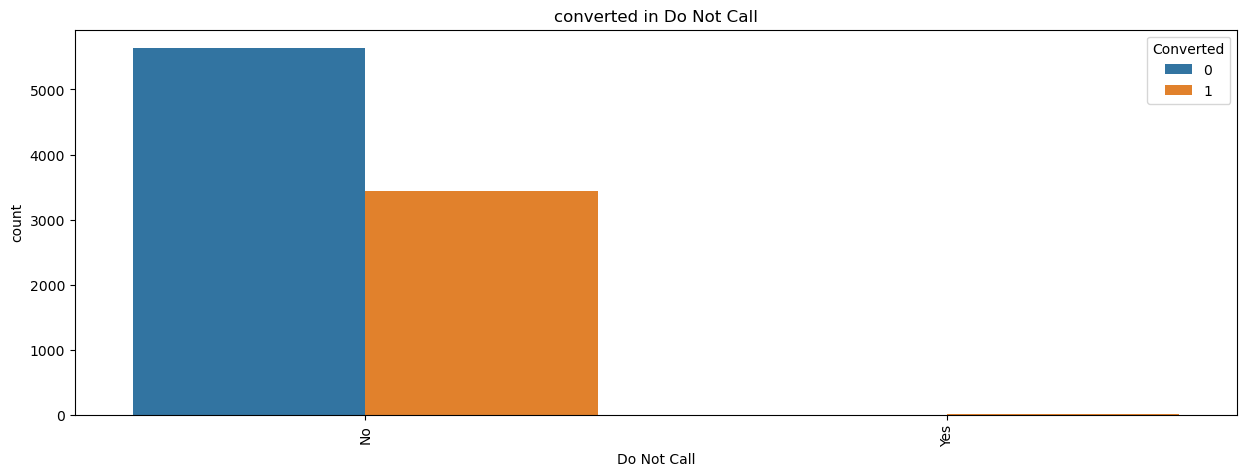

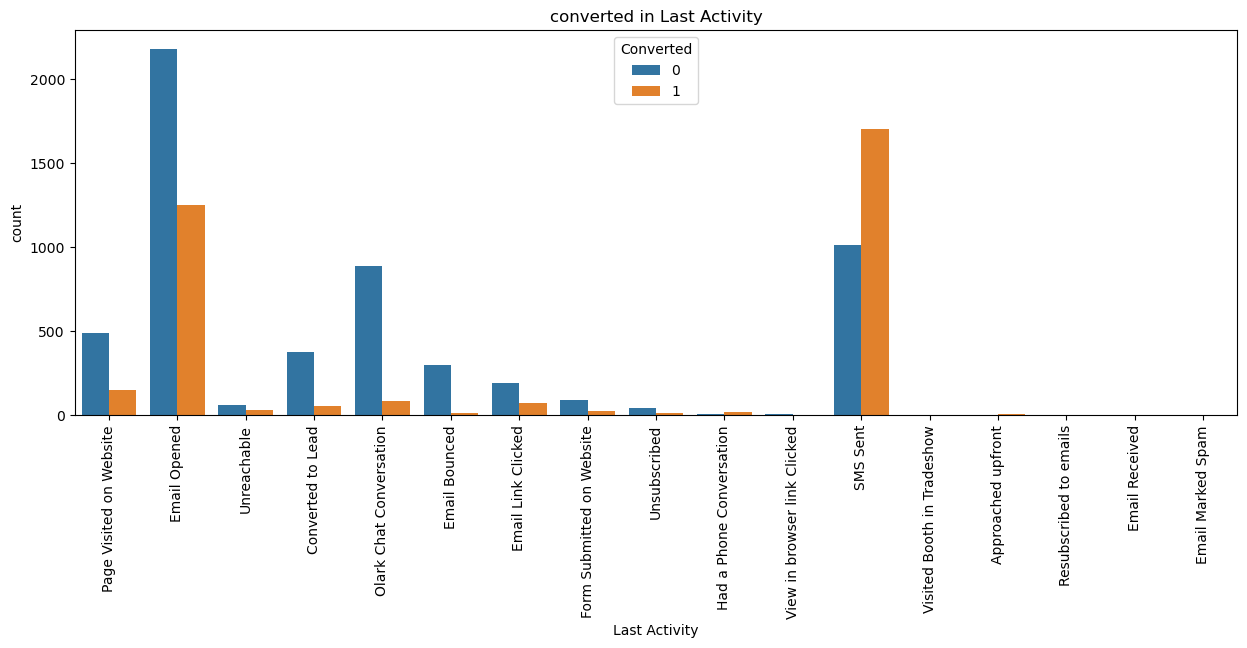

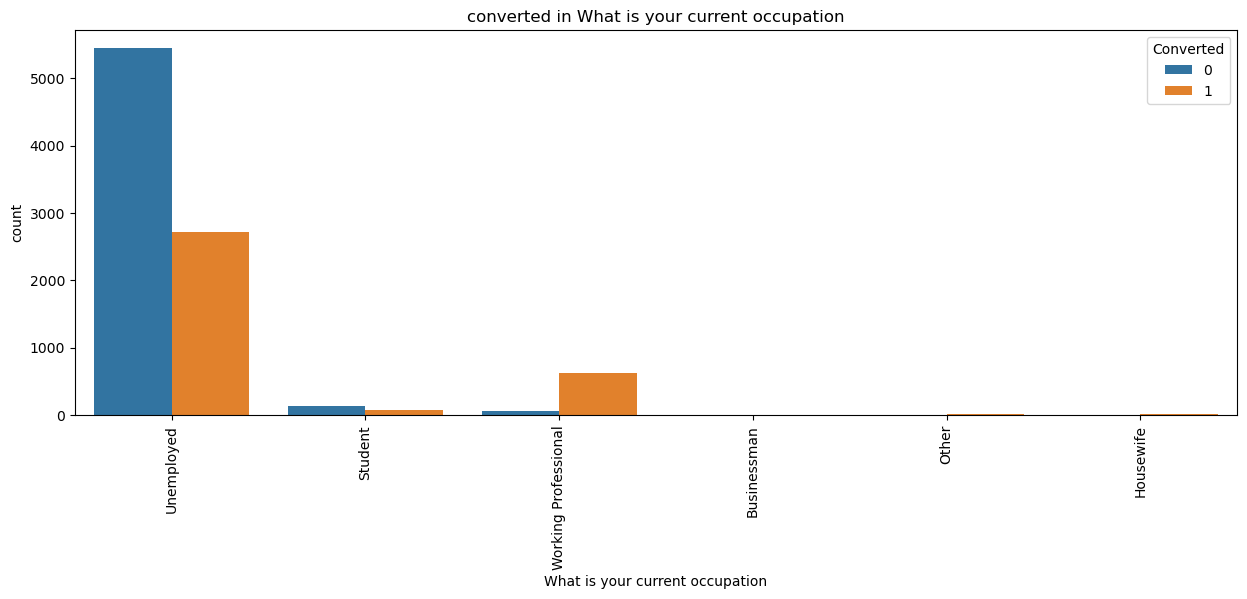

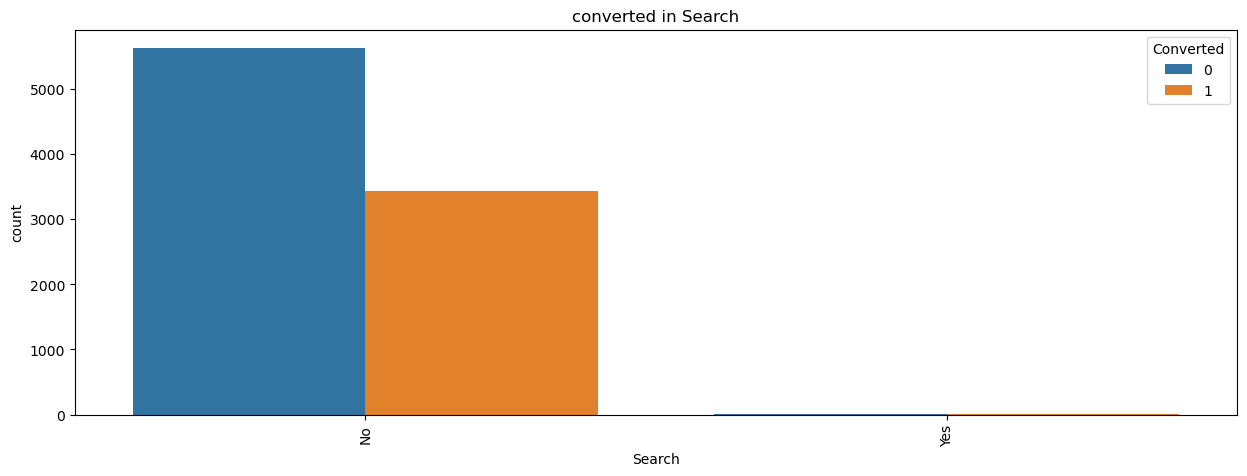

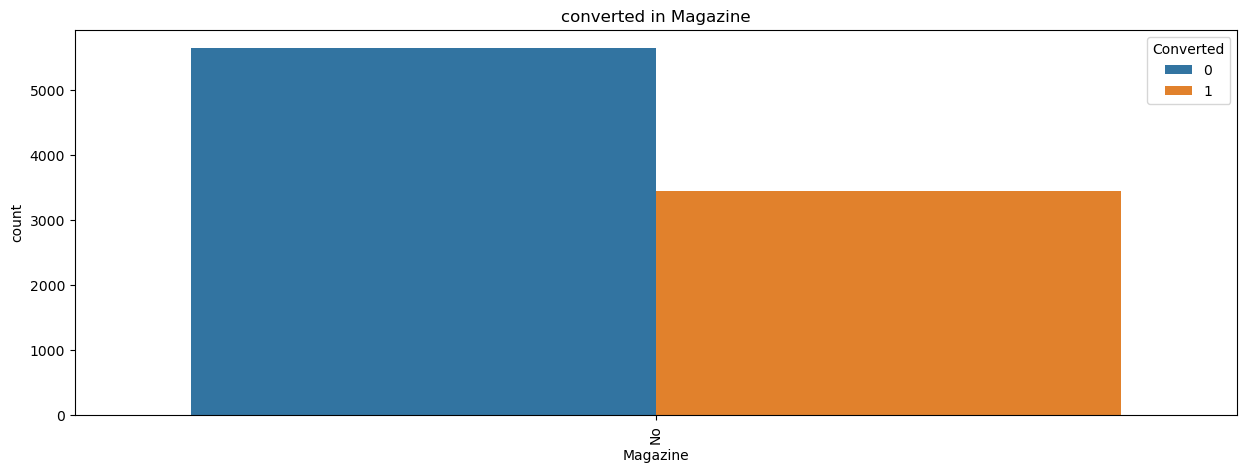

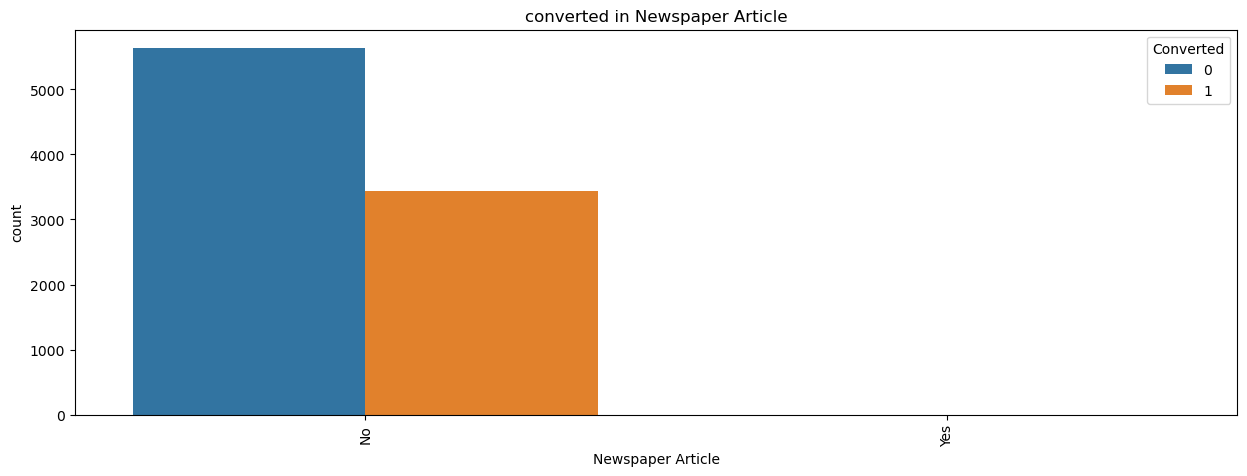

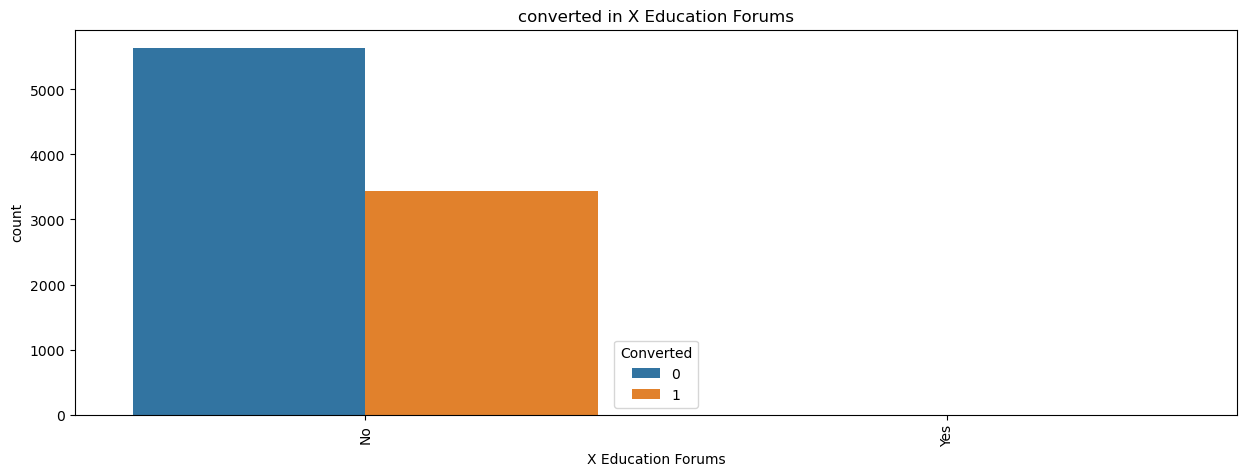

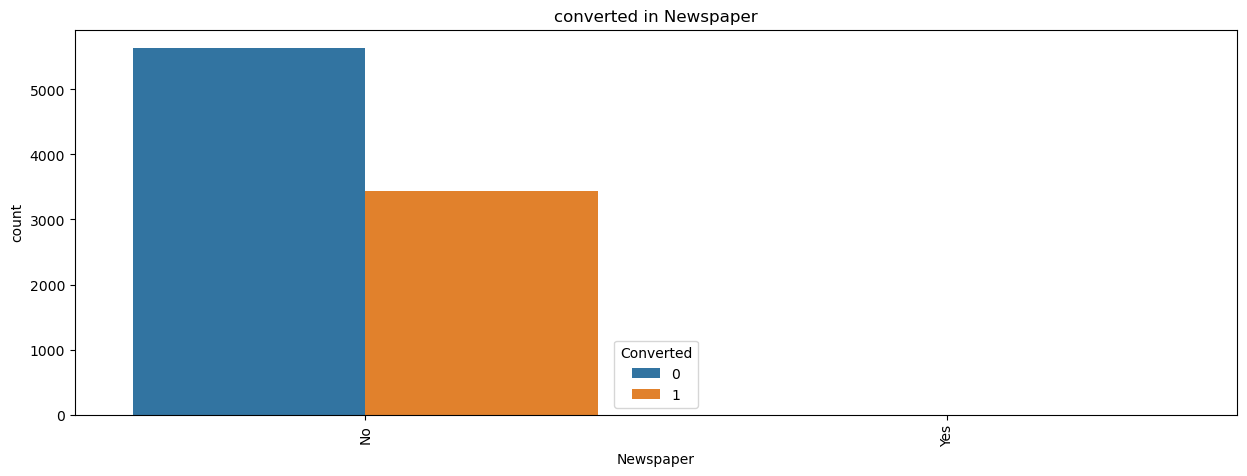

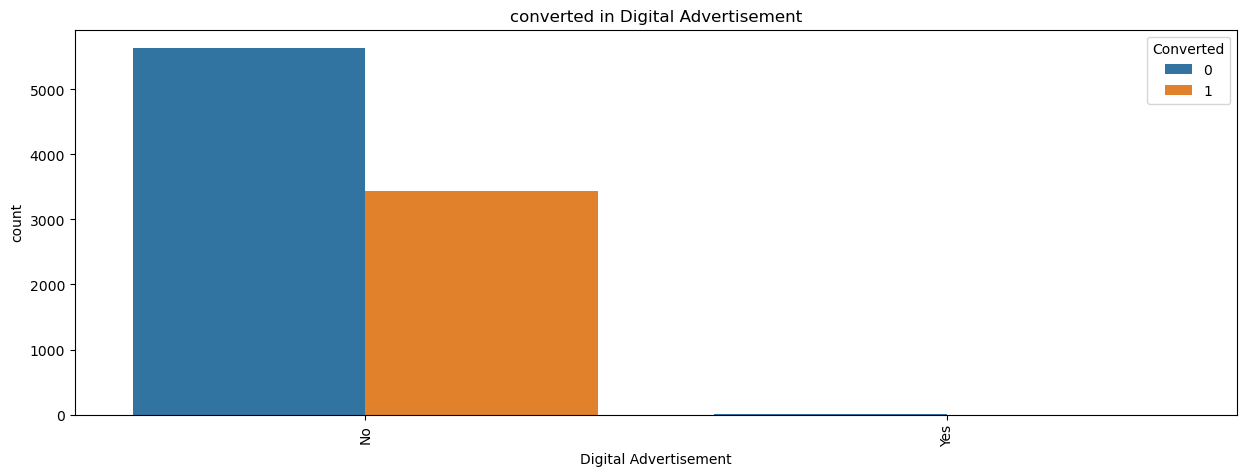

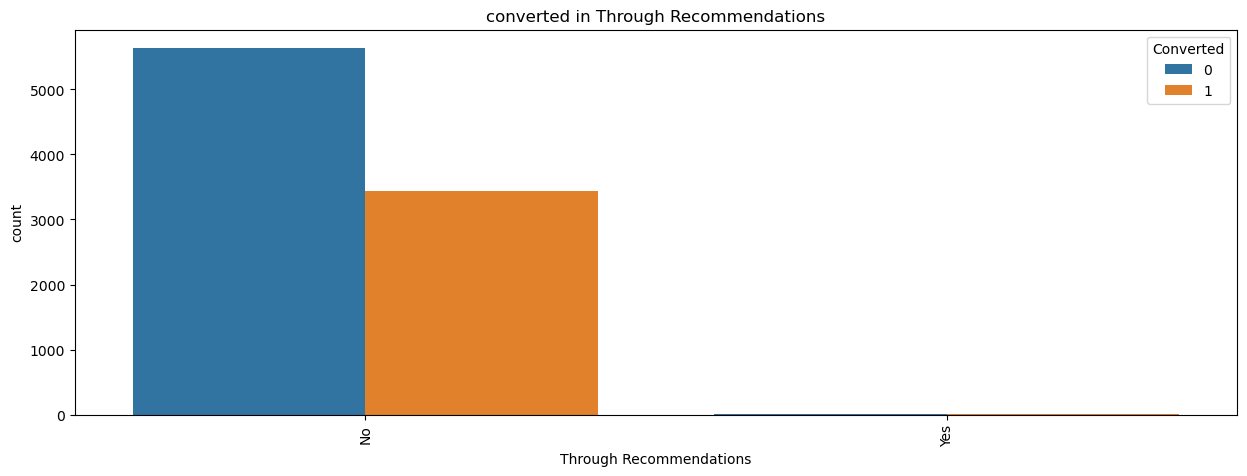

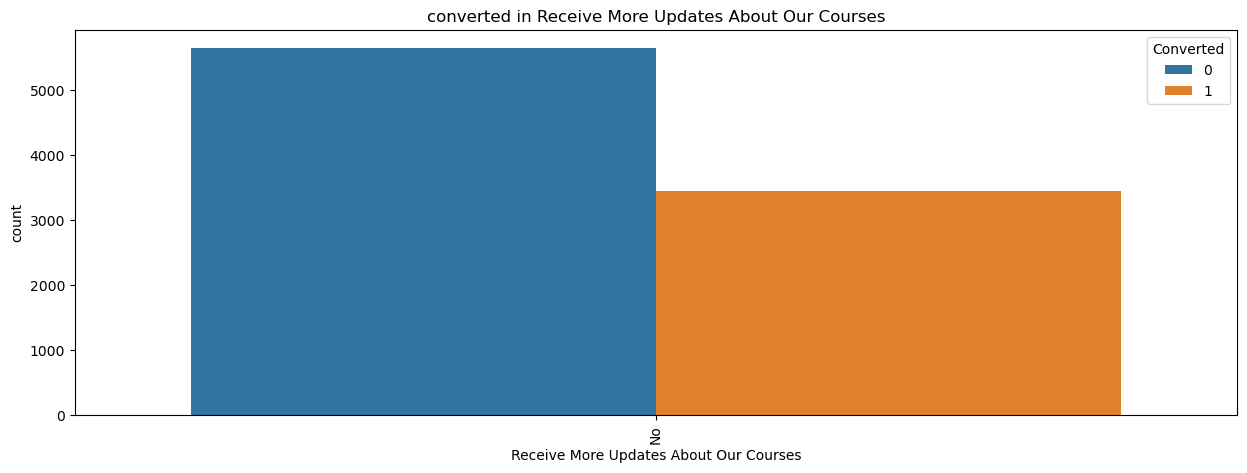

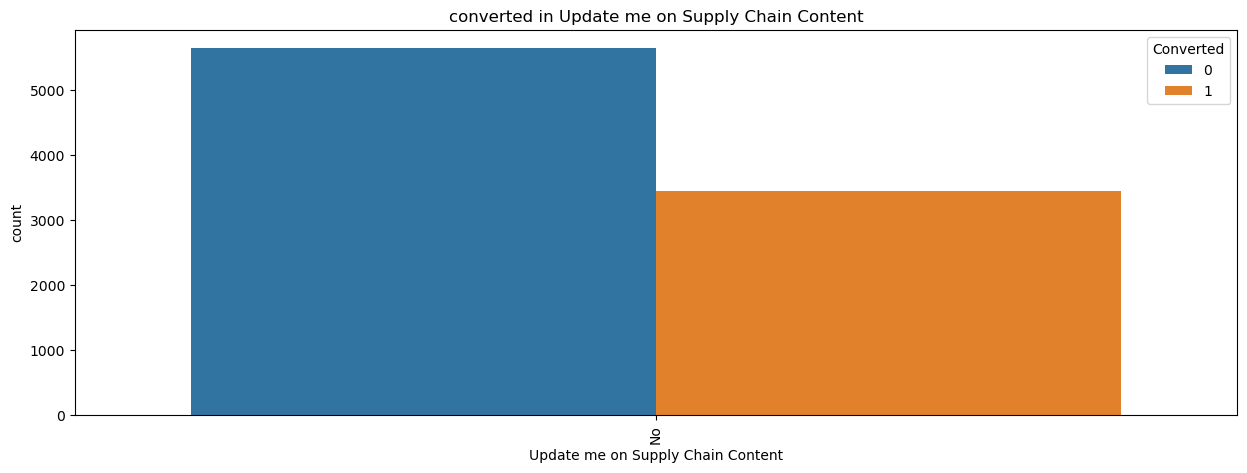

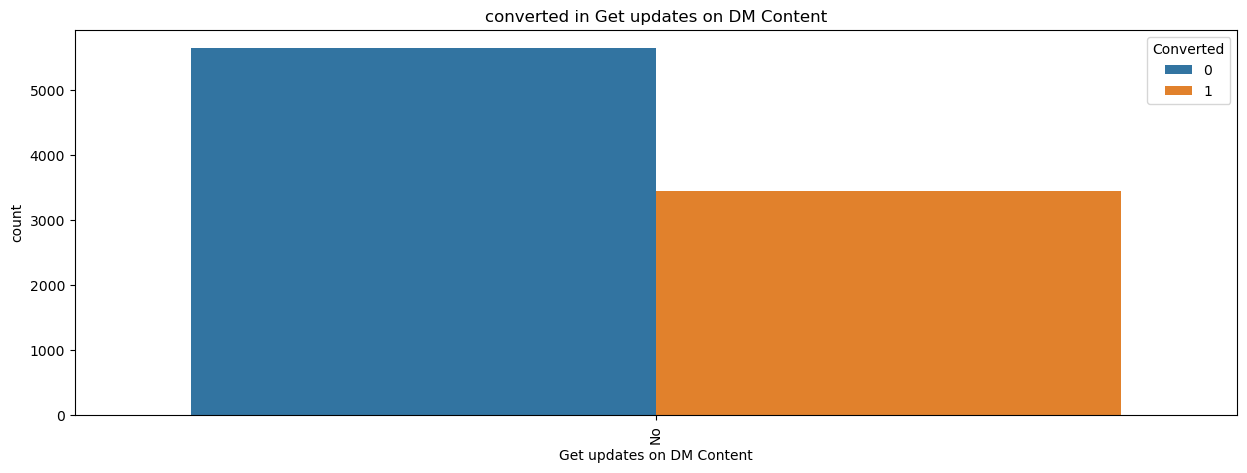

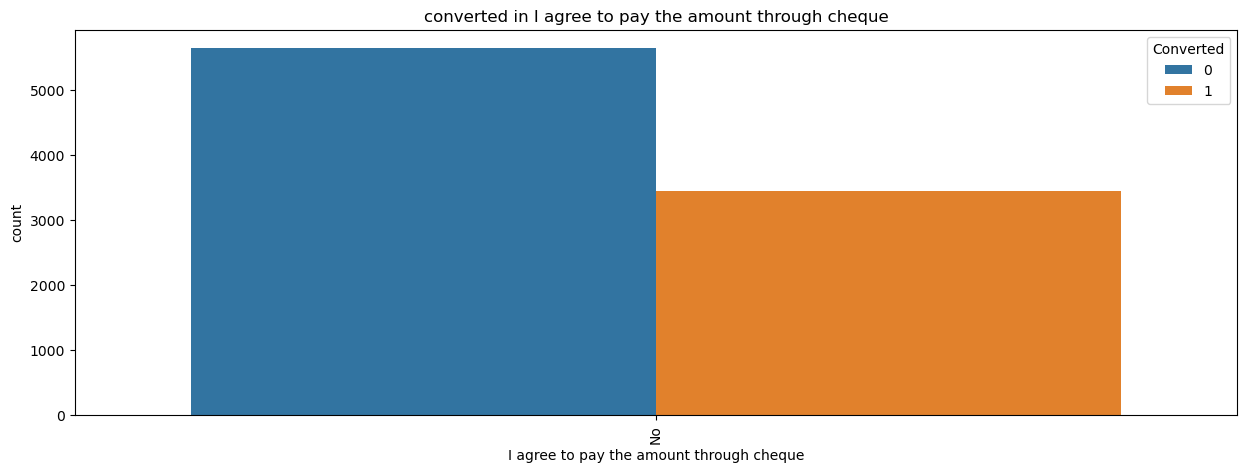

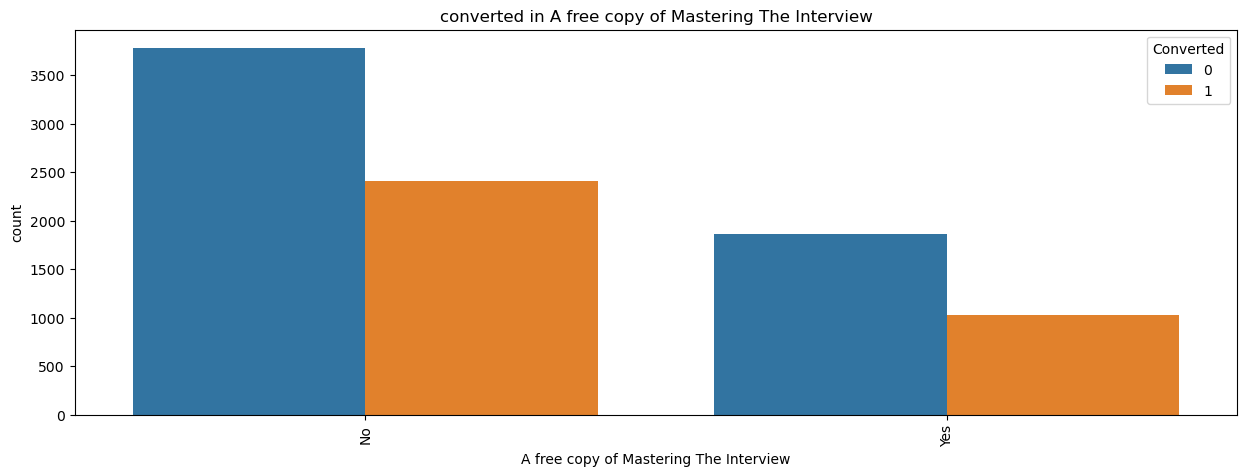

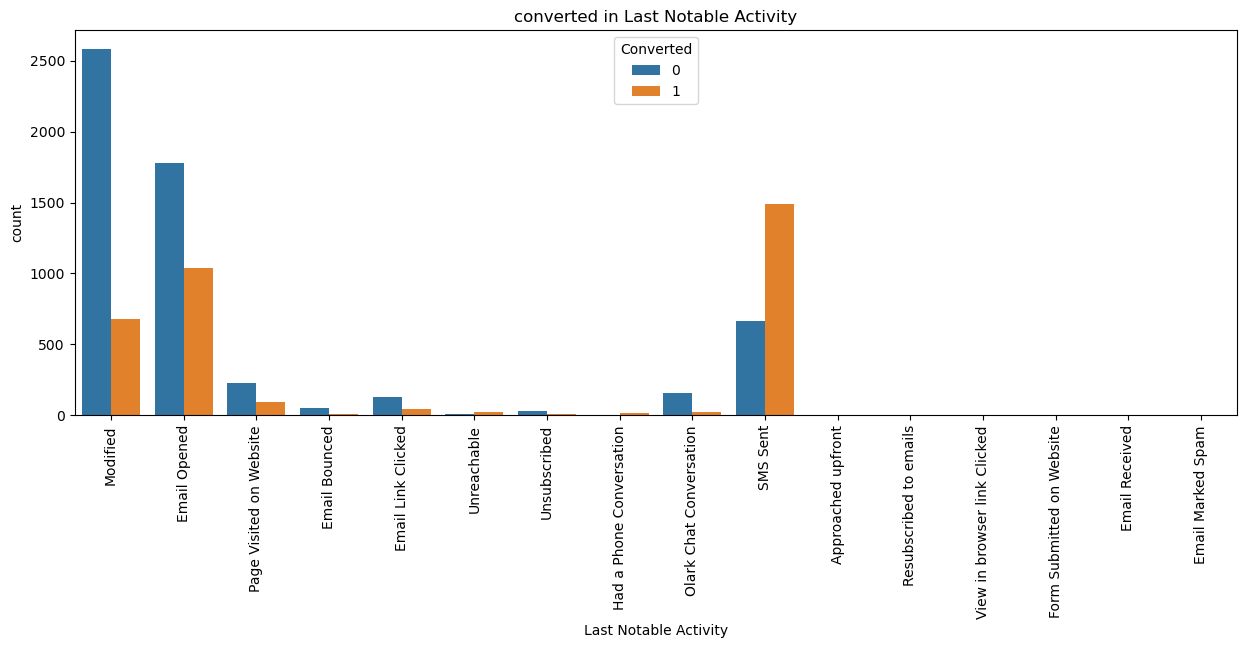

In [24]:
# Checking categorical variables with converted variable

cat_var = lead_data.select_dtypes(include ="object").columns
for i in cat_var:
    
    plt.figure(figsize =(15,5))
    sns.countplot(lead_data[i], hue=lead_data.Converted)
    plt.xticks(rotation = 90)
    plt.title('converted in'+' '+ i)
    plt.xlabel(i)
    plt.show()

### Insights:
- Leads with lead source - Reference or welingak website are having higher conversion rate compared to all others.
- leard whose last activity is - SMS sent are more likely to get converted
- Working professionals are having highest convesion rate. 

- Unemployed and Student leads are those company shold not focus on because their conversion rate is very poor.
- leads who prefer 'Do not Email' shold also be not focused as they do not seem to be interested.

In [25]:
# Checking if there are columns with one unique value since it won't affect our analysis
lead_data.nunique()

Lead Origin                                    4
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   11
Total Time Spent on Website                 1717
Page Views Per Visit                          91
Last Activity                                 17
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply Chain Content              1
Get updates on DM Content                      1
I agree to pay the a

In [26]:
# Dropping all the variables who has either only one unique value 
lead_data = lead_data.drop(['Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content',
                            'I agree to pay the amount through cheque'],1)

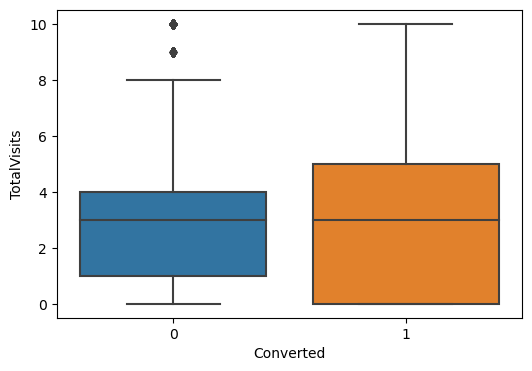

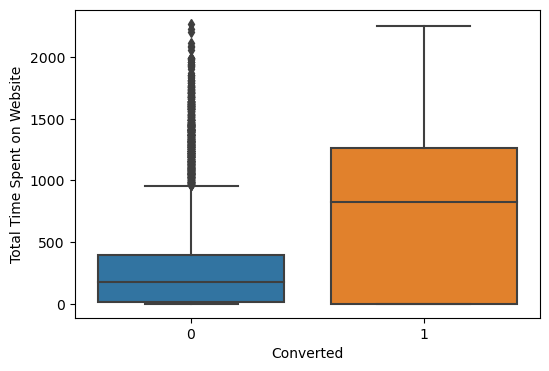

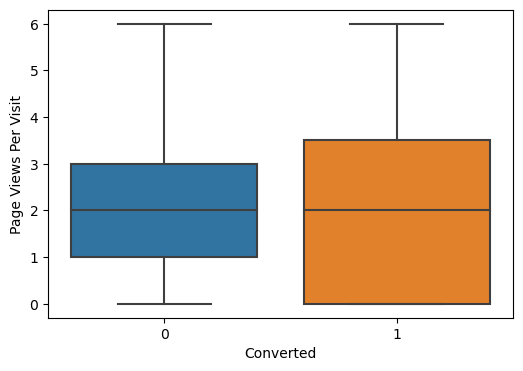

In [27]:
#checking Spread of "Total Visits" vs Converted variable
plt.figure(figsize =(6,4))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)
plt.show()

#checking Spread of "Total Time Spent on Website" vs Converted variable
plt.figure(figsize =(6,4))
sns.boxplot(x = lead_data.Converted, y = lead_data['Total Time Spent on Website'])
plt.show()

#checking Spread of "Page Views Per Visit" vs Converted variable
plt.figure(figsize =(6,4))
sns.boxplot(x = lead_data.Converted, y = lead_data['Page Views Per Visit'])
plt.show()

### Insights:
- Leads who are spending more time on website are most likely to get converted with different probabilities.
- Number of visits to website is alfo inportant factor to get converted

In [28]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


### 5. Data Preparation :  Converting binary variables (Yes/No) to 0/1 

In [29]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [30]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


### 5. Data Preparation : Creating Dummy variables and Dropping repeated variables

In [31]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Do Not Call                             9074 non-null   int64  
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   int6

In [32]:
# Checking the columns which are of type 'object'

cat_col = lead_data.loc[:, lead_data.dtypes == 'object']
cat_col.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [33]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 
                                  'What is your current occupation', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
lead_data = pd.concat([lead_data, dummy], axis=1)

In [34]:
# Dropping the variables for which the dummy variables have been created

lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation','Last Notable Activity'], 1)

In [35]:
# Let's take a look at the dataset again
lead_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Step 4: Test-Train Split

In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

In [37]:
#putting predictor variables in X
X = lead_data.drop(['Converted'], 1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
# Putting the target variable in y
y = lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [39]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6351, 65) (2723, 65) (6351,) (2723,)


## Step 5: Feature Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

In [42]:
# Apply scaler() to all the columns except the '1-0' and 'dummy' variables

scale_vars = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
X_train[scale_vars] = scaler.fit_transform(X_train[scale_vars])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,0.2,0.178347,0.333333,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,0.2,0.085355,0.333333,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.0,0.000000,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,0.2,0.619946,0.333333,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.5,0.711590,0.416667,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [43]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.078885,0.000315,0.320627,0.217585,0.379863,0.315383,0.535979,0.068651,0.003779,0.278066,...,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000157
std,0.269581,0.017744,0.278748,0.244868,0.300183,0.464705,0.498743,0.252879,0.061362,0.448082,...,0.012548,0.043430,0.479883,0.136719,0.182480,0.012548,0.429747,0.063857,0.066257,0.012548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.100000,0.004492,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.300000,0.110961,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.500000,0.413522,0.555000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 6: Looking at Correlations

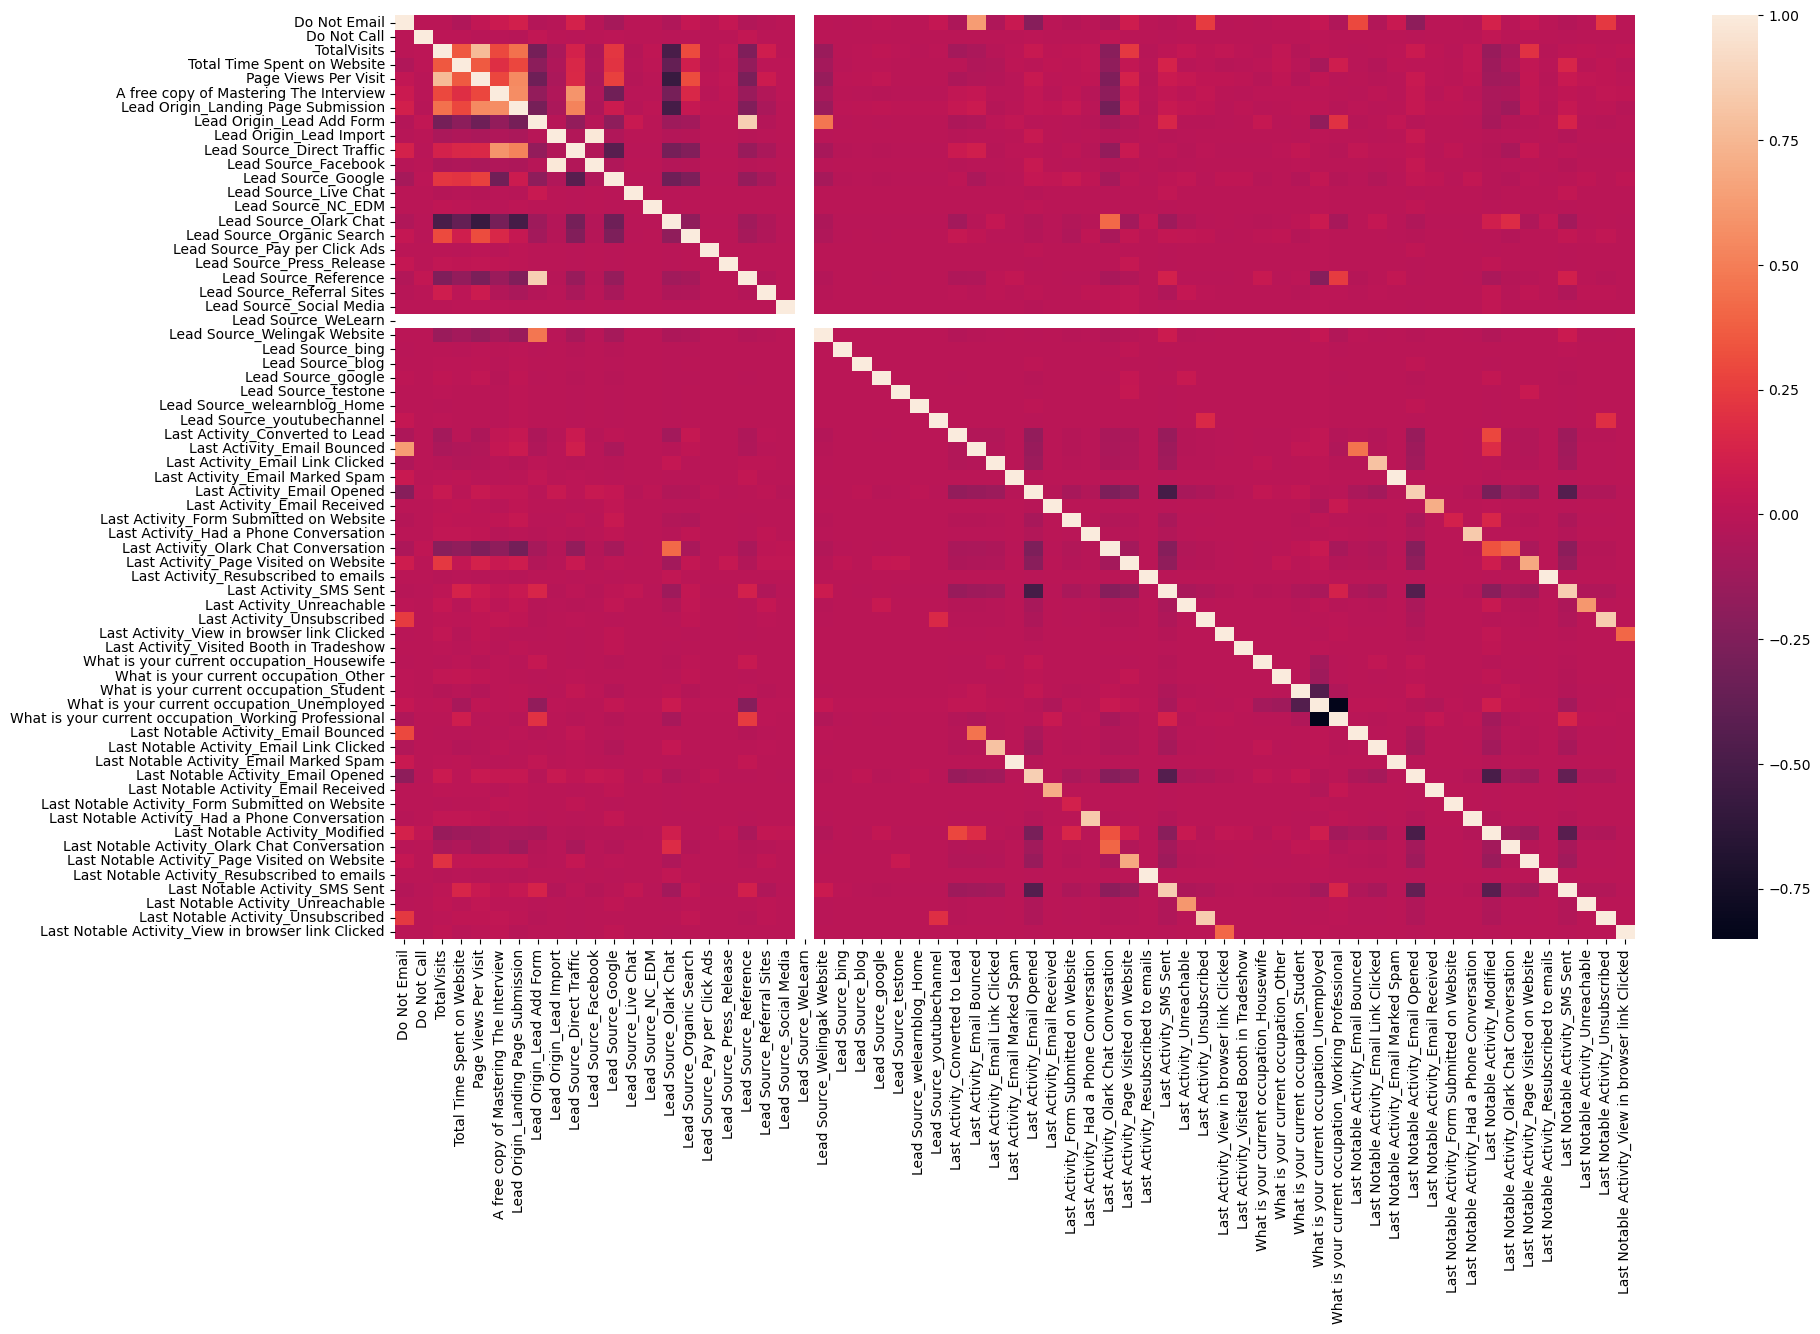

In [44]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 12))
sns.heatmap(X_train.corr(), annot = False)
plt.show()

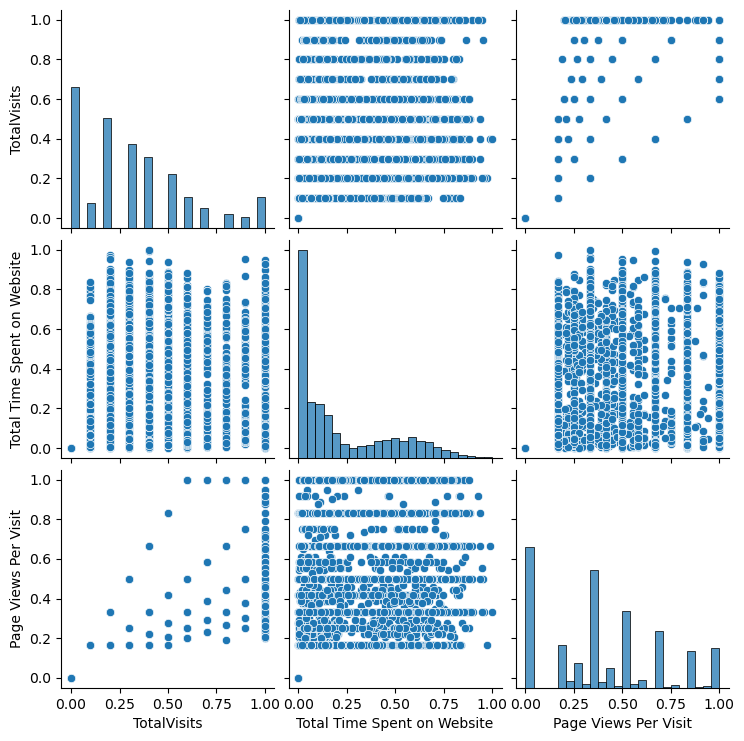

In [45]:
# lets make a pair plot for numerical variables
sns.pairplot(X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])
plt.show()

## Step 7: Model Building using Stats Model & RFE

In [46]:
#importing stats model for logistic regression
import statsmodels.api as sm

In [47]:
# variable selection using RFE (Recursive feature elimination)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select=20)         # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [48]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [49]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 5),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 45),
 ('Lead Origin_Landing Page Submission', False, 32),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Live Chat', False, 34),
 ('Lead Source_NC_EDM', False, 27),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 33),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Social Media', False, 4),
 ('Lead Source_WeLearn', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 42),
 ('Lead Source_blog', False, 25),
 ('Lead Sourc

### MODEL 1 - Running logistic regression model with RFE selected variables

In [50]:
# building first logistic regression model with RFE selected features

X_train_rfe = sm.add_constant(X_train[cols])
logreg_m1 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
result = logreg_m1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.2
Date:                Tue, 18 Jul 2023   Deviance:                       5214.5
Time:                        15:46:21   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4007
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7851      0.123     -6.407      0.000      -1.025      -0.545
Do Not Email                                            -1.5715      0.201     -7.833      0.000      -1.965      -1.178
TotalVisits                                              1.1618      0.197      5.912      0.000       0.777       1.547
Total Time Spent on Website                              4.6195      0.167     27.743      0.000       4.293       4.946
Page Views Per Visit                                    -0.9917      0.202     -4.912      0.000      -1.387      -0.596
Lead Origin_Lead Add Form                                2.1721      0.921      2.359      0.018       0.368       3.977
Lead Origin_Lead Import                                  1.5242      0.464      3.282      0.001       0.614       2.434
Lead Source_Olark Chat                                   1.2213      0.134      9.096      0.000       0.958       1.484
Lead Source_Reference                                    1.7811      0.943      1.888      0.059      -0.068       3.630
Lead Source_Welingak Website                             3.8088      1.169      3.257      0.001       1.517       6.101
Last Activity_Converted to Lead                         -1.0662      0.232     -4.605      0.000      -1.520      -0.612
Last Activity_Email Bounced                             -1.3256      0.429     -3.093      0.002      -2.166      -0.486
Last Activity_Had a Phone Conversation                   1.8386      0.787      2.335      0.020       0.296       3.382
Last Activity_Olark Chat Conversation                   -1.3481      0.191     -7.063      0.000      -1.722      -0.974
What is your current occupation_Housewife               22.7677   1.58e+04      0.001      0.999   -3.09e+04    3.09e+04
What is your current occupation_Working Professional     2.7671      0.190     14.561      0.000       2.395       3.140
Last Notable Activity_Email Link Clicked                -1.9636      0.259     -7.589      0.000      -2.471      -1.456
Last Notable Activity_Email Opened                      -1.4522      0.089    -16.350      0.000      -1.626      -1.278
Last Notable Activity_Modified                          -1.7546      0.101    -17.446      0.000      -1.952      -1.558
Last Notable Activity_Olark Chat Conversation           -1.6262      0.375     -4.332      0.000      -2.362      -0.891
Last Notable Activity_Page Visited on Website           -2.0418      0.212     -9.614      0.000      -2.458      -1.626
========================================================================================================================
"""

In [51]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,58.30
8,Lead Source_Reference,45.66
9,Lead Source_Welingak Website,15.24
0,const,13.82
4,Page Views Per Visit,3.22
2,TotalVisits,2.78
7,Lead Source_Olark Chat,2.30
18,Last Notable Activity_Modified,2.00
13,Last Activity_Olark Chat Conversation,1.79
1,Do Not Email,1.72


### Observations: 
- P-value of variable What is your current occupation_Housewife is very high 0.999 so weed to drop it

### MODEL 2 - dropping variable 'What is your current occupation_Housewife' 

In [52]:
# Dropping Last Notable Activity_Modified variable 
X_train_new = X_train_rfe.drop(["What is your current occupation_Housewife"], axis = 1)

In [53]:
#X_train_rfe = sm.add_constant(X_train_new)
logreg_m2 = sm.GLM(y_train,X_train_new, family = sm.families.Binomial())
result = logreg_m2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.7
Date:                Tue, 18 Jul 2023   Deviance:                       5223.5
Time:                        15:46:21   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3999
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7792      0.122     -6.363      0.000      -1.019      -0.539
Do Not Email                                            -1.5726      0.201     -7.835      0.000      -1.966      -1.179
TotalVisits                                              1.1588      0.196      5.902      0.000       0.774       1.544
Total Time Spent on Website                              4.6182      0.166     27.766      0.000       4.292       4.944
Page Views Per Visit                                    -0.9989      0.202     -4.952      0.000      -1.394      -0.604
Lead Origin_Lead Add Form                                2.1655      0.920      2.353      0.019       0.362       3.969
Lead Origin_Lead Import                                  1.5136      0.464      3.260      0.001       0.604       2.424
Lead Source_Olark Chat                                   1.2123      0.134      9.040      0.000       0.949       1.475
Lead Source_Reference                                    1.8050      0.943      1.914      0.056      -0.043       3.653
Lead Source_Welingak Website                             3.8071      1.169      3.256      0.001       1.516       6.098
Last Activity_Converted to Lead                         -1.0688      0.231     -4.618      0.000      -1.523      -0.615
Last Activity_Email Bounced                             -1.3249      0.429     -3.091      0.002      -2.165      -0.485
Last Activity_Had a Phone Conversation                   1.8383      0.787      2.335      0.020       0.295       3.381
Last Activity_Olark Chat Conversation                   -1.3468      0.191     -7.056      0.000      -1.721      -0.973
What is your current occupation_Working Professional     2.7632      0.190     14.538      0.000       2.391       3.136
Last Notable Activity_Email Link Clicked                -1.9497      0.257     -7.586      0.000      -2.453      -1.446
Last Notable Activity_Email Opened                      -1.4450      0.089    -16.284      0.000      -1.619      -1.271
Last Notable Activity_Modified                          -1.7542      0.101    -17.443      0.000      -1.951      -1.557
Last Notable Activity_Olark Chat Conversation           -1.6253      0.375     -4.330      0.000      -2.361      -0.890
Last Notable Activity_Page Visited on Website           -2.0413      0.212     -9.612      0.000      -2.457      -1.625
========================================================================================================================
"""

In [54]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Lead Add Form,58.30
8,Lead Source_Reference,45.65
9,Lead Source_Welingak Website,15.24
0,const,13.82
4,Page Views Per Visit,3.22
2,TotalVisits,2.78
7,Lead Source_Olark Chat,2.30
17,Last Notable Activity_Modified,2.00
13,Last Activity_Olark Chat Conversation,1.79
1,Do Not Email,1.72


### Observations: 
- Based on the p-value and VIF values Lead Source_Reference should be removed

### MODEL 3 - dropping variable Lead Source_Reference

In [55]:
# Dropping Lead Source_Reference variable 
X_train_new = X_train_new.drop(["Lead Source_Reference"], axis = 1)

In [56]:
#X_train_rfe = sm.add_constant(X_train_new)
logreg_m3 = sm.GLM(y_train,X_train_new, family = sm.families.Binomial())
result = logreg_m3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.2
Date:                Tue, 18 Jul 2023   Deviance:                       5226.5
Time:                        15:46:22   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3996
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7761      0.123     -6.334      0.000      -1.016      -0.536
Do Not Email                                            -1.5681      0.200     -7.825      0.000      -1.961      -1.175
TotalVisits                                              1.1597      0.196      5.906      0.000       0.775       1.545
Total Time Spent on Website                              4.6146      0.166     27.746      0.000       4.289       4.941
Page Views Per Visit                                    -1.0038      0.202     -4.974      0.000      -1.399      -0.608
Lead Origin_Lead Add Form                                3.8988      0.239     16.341      0.000       3.431       4.366
Lead Origin_Lead Import                                  1.5099      0.464      3.252      0.001       0.600       2.420
Lead Source_Olark Chat                                   1.2072      0.134      8.996      0.000       0.944       1.470
Lead Source_Welingak Website                             2.0692      0.755      2.742      0.006       0.590       3.548
Last Activity_Converted to Lead                         -1.0704      0.231     -4.625      0.000      -1.524      -0.617
Last Activity_Email Bounced                             -1.3293      0.428     -3.103      0.002      -2.169      -0.490
Last Activity_Had a Phone Conversation                   1.8375      0.787      2.335      0.020       0.295       3.380
Last Activity_Olark Chat Conversation                   -1.3459      0.191     -7.053      0.000      -1.720      -0.972
What is your current occupation_Working Professional     2.7650      0.190     14.556      0.000       2.393       3.137
Last Notable Activity_Email Link Clicked                -1.9452      0.257     -7.581      0.000      -2.448      -1.442
Last Notable Activity_Email Opened                      -1.4443      0.089    -16.280      0.000      -1.618      -1.270
Last Notable Activity_Modified                          -1.7533      0.101    -17.442      0.000      -1.950      -1.556
Last Notable Activity_Olark Chat Conversation           -1.6242      0.375     -4.329      0.000      -2.360      -0.889
Last Notable Activity_Page Visited on Website           -2.0481      0.213     -9.619      0.000      -2.465      -1.631
========================================================================================================================
"""

In [57]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.80
4,Page Views Per Visit,3.22
2,TotalVisits,2.78
7,Lead Source_Olark Chat,2.29
16,Last Notable Activity_Modified,2.00
5,Lead Origin_Lead Add Form,1.90
12,Last Activity_Olark Chat Conversation,1.79
1,Do Not Email,1.72
10,Last Activity_Email Bounced,1.72
15,Last Notable Activity_Email Opened,1.59


### Observations: 
- p-value (0.02) of Last Activity_Had a Phone Conversation is high compared to others

### MODEL 4 - Dropping variable Last Activity_Had a Phone Conversation

In [58]:
# Dropping Last Activity_Had a Phone Conversation variable 
X_train_new = X_train_new.drop(["Last Activity_Had a Phone Conversation"], axis = 1)

In [59]:
logreg_m4 = sm.GLM(y_train,X_train_new, family = sm.families.Binomial())
result = logreg_m4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.7
Date:                Tue, 18 Jul 2023   Deviance:                       5233.3
Time:                        15:46:22   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3989
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7647      0.122     -6.252      0.000      -1.004      -0.525
Do Not Email                                            -1.5743      0.201     -7.851      0.000      -1.967      -1.181
TotalVisits                                              1.1695      0.196      5.967      0.000       0.785       1.554
Total Time Spent on Website                              4.6084      0.166     27.746      0.000       4.283       4.934
Page Views Per Visit                                    -1.0061      0.201     -4.993      0.000      -1.401      -0.611
Lead Origin_Lead Add Form                                3.8940      0.239     16.323      0.000       3.426       4.362
Lead Origin_Lead Import                                  1.5070      0.464      3.246      0.001       0.597       2.417
Lead Source_Olark Chat                                   1.2025      0.134      8.965      0.000       0.940       1.465
Lead Source_Welingak Website                             2.0694      0.755      2.742      0.006       0.590       3.548
Last Activity_Converted to Lead                         -1.0779      0.231     -4.660      0.000      -1.531      -0.625
Last Activity_Email Bounced                             -1.3326      0.428     -3.110      0.002      -2.172      -0.493
Last Activity_Olark Chat Conversation                   -1.3520      0.191     -7.088      0.000      -1.726      -0.978
What is your current occupation_Working Professional     2.7616      0.190     14.541      0.000       2.389       3.134
Last Notable Activity_Email Link Clicked                -1.9557      0.257     -7.623      0.000      -2.459      -1.453
Last Notable Activity_Email Opened                      -1.4554      0.089    -16.423      0.000      -1.629      -1.282
Last Notable Activity_Modified                          -1.7557      0.100    -17.489      0.000      -1.952      -1.559
Last Notable Activity_Olark Chat Conversation           -1.6267      0.375     -4.336      0.000      -2.362      -0.891
Last Notable Activity_Page Visited on Website           -2.0618      0.213     -9.689      0.000      -2.479      -1.645
========================================================================================================================
"""

In [60]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.78
4,Page Views Per Visit,3.22
2,TotalVisits,2.78
7,Lead Source_Olark Chat,2.29
15,Last Notable Activity_Modified,2.00
5,Lead Origin_Lead Add Form,1.90
11,Last Activity_Olark Chat Conversation,1.79
1,Do Not Email,1.72
10,Last Activity_Email Bounced,1.72
14,Last Notable Activity_Email Opened,1.59


### Observations: 
- based on the above summary Lead Source_Welingak Website can be removed from predicting conversion

### MODEL 5 - dropping variable Lead Source_Welingak Website

In [61]:
# Dropping Lead Source_Welingak Website variable 
X_train_new = X_train_new.drop(["Lead Source_Welingak Website"], axis = 1)

In [62]:
logreg_m5 = sm.GLM(y_train,X_train_new, family = sm.families.Binomial())
result = logreg_m5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2622.8
Date:                Tue, 18 Jul 2023   Deviance:                       5245.7
Time:                        15:46:23   Pearson chi2:                 6.62e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7645      0.122     -6.253      0.000      -1.004      -0.525
Do Not Email                                            -1.5488      0.198     -7.816      0.000      -1.937      -1.160
TotalVisits                                              1.1676      0.196      5.962      0.000       0.784       1.551
Total Time Spent on Website                              4.6055      0.166     27.746      0.000       4.280       4.931
Page Views Per Visit                                    -1.0048      0.201     -4.989      0.000      -1.400      -0.610
Lead Origin_Lead Add Form                                4.2609      0.229     18.584      0.000       3.812       4.710
Lead Origin_Lead Import                                  1.5077      0.464      3.248      0.001       0.598       2.417
Lead Source_Olark Chat                                   1.2012      0.134      8.959      0.000       0.938       1.464
Last Activity_Converted to Lead                         -1.0764      0.231     -4.656      0.000      -1.530      -0.623
Last Activity_Email Bounced                             -1.3172      0.419     -3.141      0.002      -2.139      -0.495
Last Activity_Olark Chat Conversation                   -1.3537      0.191     -7.094      0.000      -1.728      -0.980
What is your current occupation_Working Professional     2.7499      0.190     14.459      0.000       2.377       3.123
Last Notable Activity_Email Link Clicked                -1.9643      0.257     -7.632      0.000      -2.469      -1.460
Last Notable Activity_Email Opened                      -1.4562      0.089    -16.440      0.000      -1.630      -1.283
Last Notable Activity_Modified                          -1.7551      0.100    -17.511      0.000      -1.952      -1.559
Last Notable Activity_Olark Chat Conversation           -1.5981      0.371     -4.302      0.000      -2.326      -0.870
Last Notable Activity_Page Visited on Website           -2.0563      0.212     -9.694      0.000      -2.472      -1.641
========================================================================================================================
"""

In [63]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.77
4,Page Views Per Visit,3.22
2,TotalVisits,2.78
7,Lead Source_Olark Chat,2.29
14,Last Notable Activity_Modified,2.00
10,Last Activity_Olark Chat Conversation,1.79
1,Do Not Email,1.72
9,Last Activity_Email Bounced,1.72
13,Last Notable Activity_Email Opened,1.59
5,Lead Origin_Lead Add Form,1.58


### MODEL 6 - dropping variable Last Activity_Email Bounced

In [64]:
# Dropping Last Lead Source_Welingak Website variable 
X_train_new = X_train_new.drop(["Last Activity_Email Bounced"], axis = 1)

In [65]:
logreg_m6 = sm.GLM(y_train,X_train_new, family = sm.families.Binomial())
result = logreg_m6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.7
Date:                Tue, 18 Jul 2023   Deviance:                       5257.4
Time:                        15:46:23   Pearson chi2:                 6.63e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3966
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7764      0.122     -6.353      0.000      -1.016      -0.537
Do Not Email                                            -1.9022      0.175    -10.899      0.000      -2.244      -1.560
TotalVisits                                              1.1693      0.196      5.971      0.000       0.785       1.553
Total Time Spent on Website                              4.6096      0.166     27.796      0.000       4.285       4.935
Page Views Per Visit                                    -0.9751      0.201     -4.848      0.000      -1.369      -0.581
Lead Origin_Lead Add Form                                4.3085      0.230     18.768      0.000       3.859       4.758
Lead Origin_Lead Import                                  1.5264      0.464      3.288      0.001       0.617       2.436
Lead Source_Olark Chat                                   1.2099      0.134      9.037      0.000       0.948       1.472
Last Activity_Converted to Lead                         -1.0547      0.231     -4.565      0.000      -1.507      -0.602
Last Activity_Olark Chat Conversation                   -1.3322      0.191     -6.983      0.000      -1.706      -0.958
What is your current occupation_Working Professional     2.7447      0.189     14.490      0.000       2.373       3.116
Last Notable Activity_Email Link Clicked                -1.9686      0.258     -7.643      0.000      -2.473      -1.464
Last Notable Activity_Email Opened                      -1.4608      0.089    -16.497      0.000      -1.634      -1.287
Last Notable Activity_Modified                          -1.7751      0.100    -17.794      0.000      -1.971      -1.580
Last Notable Activity_Olark Chat Conversation           -1.6143      0.372     -4.340      0.000      -2.343      -0.885
Last Notable Activity_Page Visited on Website           -2.0419      0.213     -9.602      0.000      -2.459      -1.625
========================================================================================================================
"""

In [66]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.73
4,Page Views Per Visit,3.21
2,TotalVisits,2.77
7,Lead Source_Olark Chat,2.29
13,Last Notable Activity_Modified,1.96
9,Last Activity_Olark Chat Conversation,1.77
12,Last Notable Activity_Email Opened,1.58
5,Lead Origin_Lead Add Form,1.57
14,Last Notable Activity_Olark Chat Conversation,1.36
3,Total Time Spent on Website,1.33


### Observations: 
- p-values and VIF values of all the predictor varibles looks decent 
- lets keep it the final logistic regression model

## Step 8: Model Evaluation

In [67]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_new)
y_train_pred[:10]

3009    0.181491
1012    0.591043
9226    0.207258
4750    0.879751
7987    0.712383
1281    0.802802
2880    0.085827
4971    0.901916
7536    0.836286
1248    0.612374
dtype: float64

In [68]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18149074, 0.59104266, 0.20725778, 0.87975101, 0.71238277,
       0.80280235, 0.08582711, 0.90191598, 0.83628648, 0.61237395])

In [69]:
# creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'conversion_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,converted,conversion_prob,Prospect ID
0,0,0.181491,3009
1,0,0.591043,1012
2,0,0.207258,9226
3,1,0.879751,4750
4,1,0.712383,7987


In [70]:
# Creating new column 'Predicted' with 1 if conversion_prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.conversion_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,converted,conversion_prob,Prospect ID,Predicted
0,0,0.181491,3009,0
1,0,0.591043,1012,1
2,0,0.207258,9226,0
3,1,0.879751,4750,1
4,1,0.712383,7987,1


In [71]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.Predicted)
print(confusion)

[[3463  442]
 [ 726 1720]]


In [72]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.Predicted))

0.8160919540229885


In [73]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7031888798037612

In [75]:
# Let us calculate specificity
TN / float(TN+FP)

0.8868117797695263

In [76]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11318822023047376


In [77]:
# positive predictive value 
print (TP / float(TP+FP))

0.7955596669750231


In [78]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8266889472427787


## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [79]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [80]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.converted, y_train_pred_final.conversion_prob, 
                                         drop_intermediate=False)

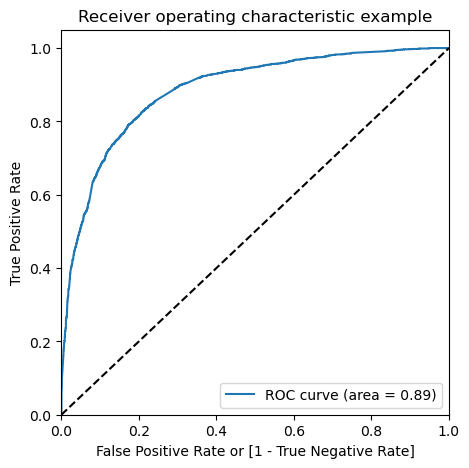

In [81]:
# Calling the ROC function
draw_roc(y_train_pred_final.converted, y_train_pred_final.conversion_prob)

## Step 10: Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [82]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.181491,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.591043,1012,1,1,1,1,1,1,1,0,0,0,0
2,0,0.207258,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.879751,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.712383,7987,1,1,1,1,1,1,1,1,1,0,0


In [83]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.609353  0.968929  0.384123
0.2   0.2  0.748229  0.920278  0.640461
0.3   0.3  0.800189  0.839330  0.775672
0.4   0.4  0.811998  0.768193  0.839437
0.5   0.5  0.816092  0.703189  0.886812
0.6   0.6  0.809479  0.638185  0.916773
0.7   0.7  0.782082  0.515536  0.949040
0.8   0.8  0.762085  0.431725  0.969014
0.9   0.9  0.705873  0.254702  0.988476


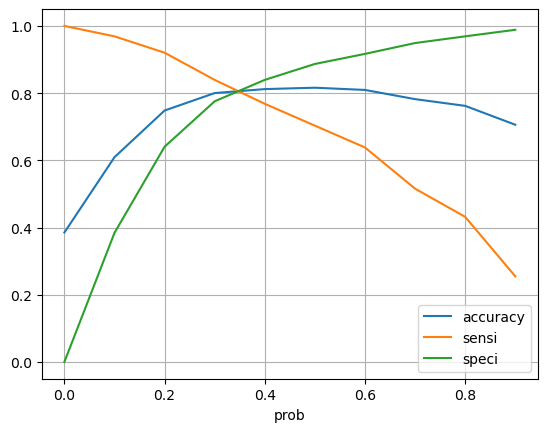

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

### Observations: 
- As you can see that around 0.35, you get the optimal values of the three metrics. So let's choose 0.35 as our cutoff now.

In [85]:
# lets add final predictions into the dataframe
y_train_pred_final['final_predicted'] = y_train_pred_final.conversion_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,converted,conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.181491,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.591043,1012,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.207258,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.879751,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.712383,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [86]:
# Let's checking the `accuracy` now
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.8083766336010078

In [87]:
# Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[3164,  741],
       [ 476, 1970]], dtype=int64)

In [88]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [89]:
# Calculating the 'Sensitivity'
TP/(TP+FN)

0.8053965658217498

In [90]:
# Calculating the 'Specificity'
TN/(TN+FP)

0.8102432778489117

In [91]:
# Precision and Recall

from sklearn.metrics import precision_score, recall_score

print("Precision :",precision_score(y_train_pred_final.converted , y_train_pred_final.Predicted))
print("Recall :",recall_score(y_train_pred_final.converted, y_train_pred_final.Predicted))

Precision : 0.7955596669750231
Recall : 0.7031888798037612


In [92]:
# Precision and recall tradeoff

from sklearn.metrics import precision_recall_curve
y_train_pred_final.converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [93]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.conversion_prob)

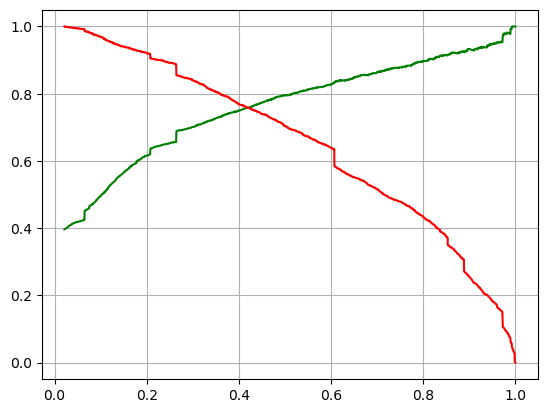

In [94]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid()
plt.show()

In [95]:
# Assigning Lead Score to the Training data
y_train_pred_final['Lead_Score'] = y_train_pred_final.conversion_prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,converted,conversion_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.181491,3009,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.591043,1012,1,1,1,1,1,1,1,0,0,0,0,1,59
2,0,0.207258,9226,0,1,1,1,0,0,0,0,0,0,0,0,21
3,1,0.879751,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.712383,7987,1,1,1,1,1,1,1,1,1,0,0,1,71


## Step 11: Making predictions on the test set

In [96]:
# Scaling the test set as well using just 'transform'

X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits", 
                                                                                                          "Total Time Spent on Website", 
                                                                                                          "Page Views Per Visit"]])

In [97]:
# Selecting the columns in X_train for X_test as well
X_test = X_test[cols]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,0.4,0.070530,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,0.5,0.679695,0.833333,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,0.2,0.033243,0.333333,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,0.0,0.000000,0.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3830,0,0.8,0.073675,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [98]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test[cols])
X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,...,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,1.0,0,0.4,0.070530,0.666667,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1490,1.0,0,0.5,0.679695,0.833333,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
7936,1.0,0,0.2,0.033243,0.333333,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4216,1.0,0,0.0,0.000000,0.000000,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3830,1.0,0,0.8,0.073675,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0,0.3,0.372417,0.250000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2879,1.0,0,0.2,0.264600,0.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6501,1.0,0,0.8,0.599730,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7155,1.0,0,0.3,0.231357,0.500000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [99]:
# Dropping the required columns from X_test as well
X_test.drop(['What is your current occupation_Housewife', 'Lead Source_Reference', 
             'Last Activity_Had a Phone Conversation','Lead Source_Welingak Website',
             'Last Activity_Email Bounced'], 1, inplace = True)

In [100]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = result.predict(sm.add_constant(X_test))

In [101]:
y_test_pred[:10]

3271    0.109638
1490    0.968096
7936    0.102005
4216    0.852842
3830    0.125948
1800    0.706585
6507    0.343878
4821    0.285752
4223    0.971588
4714    0.207258
dtype: float64

In [102]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [103]:
# Let's see the head
y_pred_1.head()

,0
3271,0.109638
1490,0.968096
7936,0.102005
4216,0.852842
3830,0.125948


In [104]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [105]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [106]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [107]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [108]:
# Check 'y_pred_final'
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.109638
1,1,1490,0.968096
2,0,7936,0.102005
3,1,4216,0.852842
4,0,3830,0.125948


In [109]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'conversion_prob'})
y_pred_final.head()

,Converted,Prospect ID,conversion_prob
0,0,3271,0.109638
1,1,1490,0.968096
2,0,7936,0.102005
3,1,4216,0.852842
4,0,3830,0.125948


In [110]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','conversion_prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,conversion_prob
0,3271,0,0.109638
1,1490,1,0.968096
2,7936,0,0.102005
3,4216,1,0.852842
4,3830,0,0.125948


In [111]:
# Make predictions on the test set using 0.35 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.conversion_prob.map(lambda x: 1 if x > 0.35 else 0)

In [112]:
# Check y_pred_final
y_pred_final.head()

,Prospect ID,Converted,conversion_prob,final_predicted
0,3271,0,0.109638,0
1,1490,1,0.968096,1
2,7936,0,0.102005,0
3,4216,1,0.852842,1
4,3830,0,0.125948,0


In [113]:
# Let's checking the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8035255233198678

In [114]:
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_test

array([[1405,  329],
       [ 206,  783]], dtype=int64)

In [115]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [116]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.7917087967644085

In [117]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.8102652825836217

In [118]:
# Calculating the Precision
TP/(TP+FP)

0.704136690647482

In [119]:
# Calculating Recall
TP/(TP+FN)

0.7917087967644085

In [120]:
# Assigning Lead Score to the Testing data
y_pred_final['Lead_Score'] = y_pred_final.conversion_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,conversion_prob,final_predicted,Lead_Score
0,3271,0,0.109638,0,11
1,1490,1,0.968096,1,97
2,7936,0,0.102005,0,10
3,4216,1,0.852842,1,85
4,3830,0,0.125948,0,13


In [121]:
result.params.sort_values(ascending=False)

Total Time Spent on Website                             4.609552
Lead Origin_Lead Add Form                               4.308545
What is your current occupation_Working Professional    2.744661
Lead Origin_Lead Import                                 1.526429
Lead Source_Olark Chat                                  1.209940
TotalVisits                                             1.169278
const                                                  -0.776421
Page Views Per Visit                                   -0.975101
Last Activity_Converted to Lead                        -1.054693
Last Activity_Olark Chat Conversation                  -1.332204
Last Notable Activity_Email Opened                     -1.460780
Last Notable Activity_Olark Chat Conversation          -1.614252
Last Notable Activity_Modified                         -1.775053
Do Not Email                                           -1.902232
Last Notable Activity_Email Link Clicked               -1.968566
Last Notable Activity_Pag

## Results :
Comparing the values obtained for Train & Test:

Train Data:
- Accuracy    : 81.7 %
- Sensitivity : 70.3 %
- Specificity : 88.7 %

Test Data:
- Accuracy    : 80.4 %
- Sensitivity : 79.2 %
- Specificity : 81.0 %
- Precision   : 70.4 %
- Recall      : 79.2 %

## Recomendations: 
- X company should focus on leads who spent more time on wesite.
- X company should target leads who are currently working professionals
- Leads whose lead origin is either 'Lead Add Form'  or  'Lead Import' they are more likely to get converted.
- X company can also focus on leads whose number of visits to website is higher.
- Leads who are selecting not to get emailed less likely to get converted so dont focus on them
- The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.